In [2]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/DataminingContest2009.Task2.Train.Inputs')
target = pd.read_csv('data/DataminingContest2009.Task2.Train.Targets')
df = df.merge(target, left_index=True, right_index=True)
df.rename(columns={'0':'fraud'}, inplace=True)
df.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 20 columns):
amount        99999 non-null float64
hour1         99999 non-null int64
state1        99998 non-null object
zip1          99999 non-null int64
custAttr1     99999 non-null int64
field1        99999 non-null int64
custAttr2     99999 non-null object
field2        99999 non-null int64
hour2         99999 non-null int64
flag1         99999 non-null int64
total         99999 non-null float64
field3        99999 non-null int64
field4        99999 non-null int64
indicator1    99999 non-null int64
indicator2    99999 non-null int64
flag2         99999 non-null int64
flag3         99999 non-null int64
flag4         99999 non-null int64
flag5         99999 non-null int64
fraud         99999 non-null int64
dtypes: float64(2), int64(16), object(2)
memory usage: 16.0+ MB


In [435]:
df.describe()

,amount,hour1,zip1,custAttr1,field1,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
count,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000
mean,26.976720,14.016050,544.309063,1.234568e+15,2.368264,0.405374,14.03053,0.419714,26.976720,368.757788,15.026200,0.113371,0.017850,0.556406,0.391394,0.013730,16.03750,0.026540
std,14.595024,5.415142,317.287693,2.140153e+04,0.998771,0.490967,5.40947,0.493515,14.595024,4151.207393,6.450303,0.317048,0.132407,0.496811,0.488065,0.116369,191.19551,0.160736
min,0.000000,0.000000,6.000000,1.234568e+15,0.000000,0.000000,0.00000,0.000000,0.000000,-26803.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12.950000,11.000000,279.000000,1.234568e+15,2.000000,0.000000,11.00000,0.000000,12.950000,-2260.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
50%,25.900000,14.000000,535.000000,1.234568e+15,3.000000,0.000000,14.00000,0.000000,25.900000,1093.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,38.850000,18.000000,891.000000,1.234568e+15,3.000000,1.000000,18.00000,1.000000,38.850000,3517.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000
max,59.950000,23.000000,999.000000,1.234568e+15,4.000000,1.000000,23.00000,1.000000,59.950000,8169.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.00000,1.000000


#### right off the bat it looks like there were purchases entered as $0 -- these will likely need to be deleted, presumably owing to input error
#### it's also worth noting that 2.65 % of all transactions are fraud
#### who knows what our flags and indicators are but my suspicion is that indicator2 and flag4 have stronger correlation with fraud as their means are closest

In [436]:
df.isna().sum()

amount        0
hour1         0
state1        1
zip1          0
custAttr1     0
field1        0
custAttr2     0
field2        0
hour2         0
flag1         0
total         0
field3        0
field4        0
indicator1    0
indicator2    0
flag2         0
flag3         0
flag4         0
flag5         0
fraud         0
dtype: int64

In [437]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [438]:
df = df[df.amount != 0]
df.reset_index(drop=True, inplace=True)

In [439]:
#check that we can drop one or the other
df[df.amount != df.total]

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud


In [440]:
df.pop('total')

0        12.95
1        38.85
2        38.85
3        12.95
4        38.85
         ...  
98090    25.90
98091    31.08
98092    49.95
98093    11.01
98094    12.95
Name: total, Length: 98095, dtype: float64

In [441]:
df[df.hour1 != df.hour2]

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
76,38.85,7,OH,454,1234567890123525,3,brtjtphsbisqb@paradigmasset.com,0,8,0,-3166,8,0,0,1,1,0,2,0
109,34.97,8,VA,201,1234567890123557,3,mqbomhkvofshy@lycos.com,0,9,1,-1965,7,0,0,0,0,0,1,0
465,12.95,16,TX,761,1234567890123892,3,dvirbnkgkitlk2@aol.com,1,15,0,1065,15,0,0,1,1,0,1,0
467,49.95,16,GA,303,1234567890123893,2,vqzakxmdkigem@bellsouth.net,1,15,0,-6674,21,0,0,0,0,0,1,0
508,38.85,16,IN,474,1234567890123932,3,wjhmtjmxmskmp17@yahoo.com,1,17,0,2925,20,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97731,38.85,9,AL,357,1234567890161728,3,atgthpjcjcoww@ngc.com,1,10,1,4063,8,0,0,1,0,0,1,0
97866,49.95,12,AZ,852,1234567890197026,3,phpqriqrmubjz@hotmail.com,0,11,0,3926,9,1,0,1,1,0,2,0
97939,38.85,12,CA,941,1234567890197084,3,vtajtzawnxucb@yahoo.com,0,13,1,114,8,0,0,1,1,0,1,0
97943,38.85,12,FL,331,1234567890197087,2,yommholfyihtn99@aol.com,1,13,0,-4629,16,1,0,1,1,0,1,0


In [442]:
df = df[df.hour1 == df.hour2]
df.pop('hour2')
df.rename(columns={'hour1':'hour'},inplace=True)
df.reset_index(drop=True, inplace=True)

In [443]:
'''fig, ax = plt.subplots(figsize=(18, 9))
likes = df.groupby('state1').fraud.mean()
ax.set_title('Fraud by State', fontsize=25)
ax.set_xlabel('state', fontsize=18)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.bar(likes.index, likes)
fig.savefig('visuals/fraudbystate.png')'''

"fig, ax = plt.subplots(figsize=(18, 9))\nlikes = df.groupby('state1').fraud.mean()\nax.set_title('Fraud by State', fontsize=25)\nax.set_xlabel('state', fontsize=18)\nax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)\nax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)\nax.bar(likes.index, likes)\nfig.savefig('visuals/fraudbystate.png')"

In [444]:
df.pop('state1')

In [466]:
df.pop('zip1')

0        986
1        980
2        402
3        958
4        300
        ... 
95898    770
95899    313
95900    704
95901    117
95902    245
Name: zip1, Length: 95903, dtype: int64

In [445]:
df['custAttr2'] = df['custAttr2'].apply(lambda s: s.split('@')[-1])
df.rename(columns={'custAttr2':'email', 'custAttr1':'account_id'},inplace=True)

In [446]:
e_dict = defaultdict()
email_counts = df.email.value_counts()
for count in set(email_counts):
    e_mask = email_counts[email_counts==count].index
    fraud_rate = df[df.email.isin(e_mask)].fraud.mean()
    e_dict[count] = fraud_rate

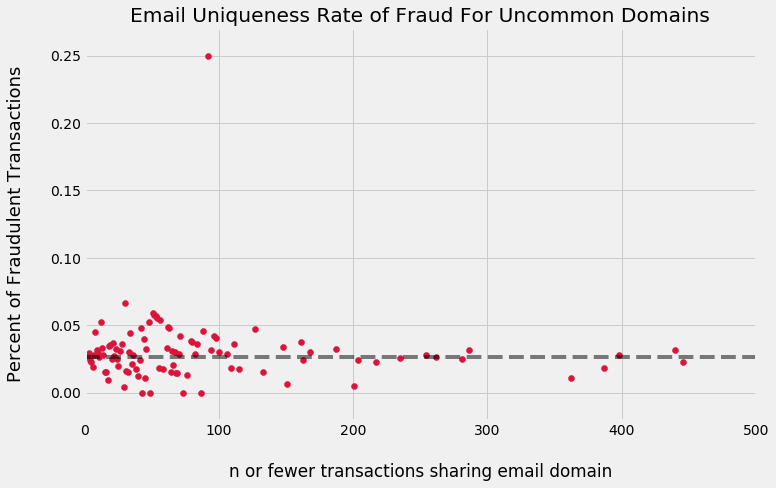

In [450]:
emails = np.array(sorted(e_dict.items()))
fig, ax = plt.subplots(figsize=(11,7))
ax.scatter(emails[:,0], emails[:,1], c='crimson')
ax.set_title('Email Uniqueness Rate of Fraud For Uncommon Domains')
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.set_xlim([0, 500])
ax.set_xlabel('n or fewer transactions sharing email domain', labelpad=25)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
plt.tight_layout()
fig.savefig('visuals/emailuniqueness.png');

In [422]:
email_counts[email_counts==92]

clintmiller.com    92
Name: email, dtype: int64

In [423]:
df = df[df.email != 'clintmiller.com']
df.reset_index(drop=True, inplace=True)

In [451]:
df.pop('email')

0            comcast.net
1              zjyxs.net
2                aol.com
3          sbcglobal.net
4          bellsouth.net
              ...       
95898            msn.com
95899    ucxhcpouwmc.net
95900       xnzysnub.com
95901            aol.com
95902            aol.com
Name: email, Length: 95903, dtype: object

In [389]:
def simple_fields(df, field):
    d = defaultdict(list)
    categories = df[field].unique()
    for cat in categories:
        fm = df[df[field] == cat].fraud.mean()
        count = df[df[field] == cat].shape[0]
        if fm  == 0:
            d['legal'].append({cat:count})
        else:
            d['fraud'].append({cat:(round(fm, 5), count)})
    
    print (field)
    print ('FRAUD | Category : (fraud%, group size)')
    print (d['fraud']) 
    print ('LEGAL | Category : group size')
    print (d['legal'])
    return

In [391]:
df.head(1)

,amount,hour,zip1,account_id,field1,email,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,986,1234567890123456,0,comcast.net,0,0,-723,19,0,0,0,0,0,1,0


In [394]:
fields = ['field1', 'field2', 'flag1', 'field4', 'indicator1', 'indicator2',
          'flag2', 'flag3', 'flag4', 'flag5']
#field3 is very messy so we'll discount for now
for f in fields:
    simple_fields(df, f)
    print ('')

field1
FRAUD | Category : (fraud%, group size)
[{0: (0.02765, 10921)}, {3: (0.02568, 56885)}, {2: (0.02663, 25352)}, {1: (0.02484, 2737)}]
LEGAL | Category : group size
[{4: 8}]

field2
FRAUD | Category : (fraud%, group size)
[{0: (0.02652, 57057)}, {1: (0.02556, 38846)}]
LEGAL | Category : group size
[]

flag1
FRAUD | Category : (fraud%, group size)
[{0: (0.02498, 54808)}, {1: (0.02767, 41095)}]
LEGAL | Category : group size
[]

field4
FRAUD | Category : (fraud%, group size)
[{19: (0.02315, 5055)}, {14: (0.02376, 2357)}, {23: (0.02639, 3524)}, {31: (0.00513, 195)}, {21: (0.02687, 4949)}, {24: (0.02814, 2843)}, {7: (0.02371, 7000)}, {9: (0.0281, 9750)}, {6: (0.02976, 5309)}, {10: (0.02961, 5302)}, {25: (0.02997, 2069)}, {17: (0.02268, 4674)}, {18: (0.0258, 5813)}, {16: (0.02494, 3970)}, {11: (0.02525, 3248)}, {20: (0.0264, 5417)}, {8: (0.02721, 8378)}, {22: (0.02424, 4497)}, {26: (0.02495, 1443)}, {32: (0.00694, 144)}, {29: (0.02963, 540)}, {13: (0.02505, 1836)}, {12: (0.02251, 2310)},

In [455]:
df.pop('flag3')

0        0
1        1
2        1
3        0
4        0
        ..
95898    1
95899    0
95900    0
95901    1
95902    0
Name: flag3, Length: 95903, dtype: int64

### CREATE VALIDATION DATASET

In [467]:
df

,amount,hour,account_id,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag4,flag5,fraud
0,12.95,0,1234567890123456,0,0,0,-723,19,0,0,0,0,1,0
1,38.85,0,1234567890123457,3,1,0,5497,14,1,0,0,0,1,0
2,38.85,0,1234567890123458,2,1,0,-4420,23,0,0,1,0,1,0
3,12.95,0,1234567890123459,3,0,0,5010,31,0,0,1,0,1,0
4,38.85,0,1234567890123460,3,1,0,-4074,21,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95898,25.90,14,1234567890197180,3,1,0,3130,17,1,0,1,0,1,0
95899,31.08,14,1234567890197181,2,0,1,-8044,10,0,0,0,0,1,0
95900,49.95,14,1234567890197182,0,0,0,393,18,1,0,1,0,1,0
95901,11.01,14,1234567890196488,3,1,1,4261,11,0,0,1,0,1,0


In [424]:
test_mask = np.random.choice(np.arange(df.shape[0]), 30000, replace=False)

In [425]:
train_mask = np.delete(np.arange(df.shape[0]), test_mask)

In [468]:
test_df, train_df = df.iloc[test_mask], df.iloc[train_mask]

In [428]:
test_df.describe()

,amount,hour,zip1,account_id,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag4,flag5,fraud
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.0000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,27.542352,14.046233,541.434500,1.234568e+15,2.336400,0.4050,0.429433,377.002267,15.013033,0.112867,0.016567,0.556867,0.014133,1.489533,0.026100
std,14.244343,5.382044,317.395923,2.134736e+04,0.981462,0.4909,0.495004,4143.121494,6.471831,0.316435,0.127643,0.496764,0.118043,28.416789,0.159435
min,9.500000,0.000000,6.000000,1.234568e+15,0.000000,0.0000,0.000000,-21980.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.950000,11.000000,276.000000,1.234568e+15,2.000000,0.0000,0.000000,-2274.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,31.080000,14.000000,522.000000,1.234568e+15,3.000000,0.0000,0.000000,1110.000000,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,38.850000,18.000000,891.000000,1.234568e+15,3.000000,1.0000,1.000000,3525.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,59.950000,23.000000,999.000000,1.234568e+15,4.000000,1.0000,1.000000,8126.000000,44.000000,1.000000,1.000000,1.000000,1.000000,3278.000000,1.000000


In [469]:
test_df.to_csv('data/validation.csv', index=False)
train_df.to_csv('data/train.csv', index=False)

In [80]:
train_df.field2.value_counts()

0    58390
1    39705
Name: field2, dtype: int64

In [81]:
train_df.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0


In [192]:
df.head()

,amount,hour,zip1,custAttr1,field1,custAttr2,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,-723,19,0,0,0,0,0,1,0
1,38.85,0,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,5497,14,1,0,0,1,0,1,0
2,38.85,0,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,-4420,23,0,0,1,1,0,1,0
3,12.95,0,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,5010,31,0,0,1,0,0,1,0
4,38.85,0,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,-4074,21,0,0,1,0,0,1,0


<BarContainer object of 904 artists>

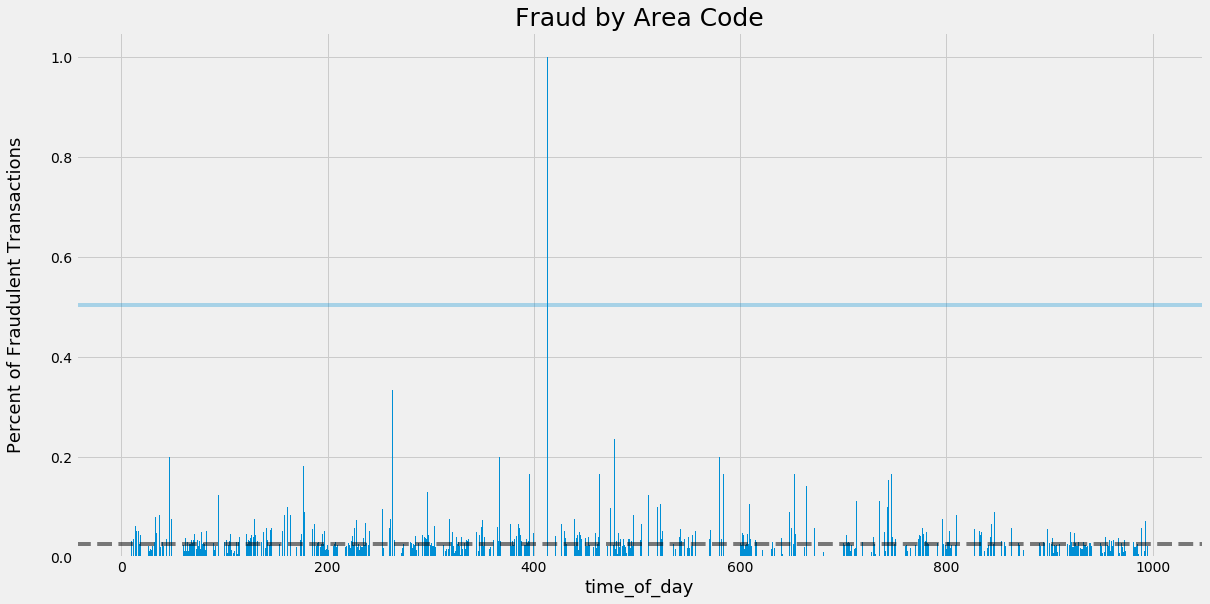

In [465]:
fig, ax = plt.subplots(figsize=(18, 9))
likes = df.groupby('zip1').fraud.mean()
ax.set_title('Fraud by Area Code', fontsize=25)
ax.set_xlabel('time_of_day', fontsize=18)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.axhline(df.fraud.mean() + df.fraud.std()*3, alpha=.3)
ax.bar(likes.index, likes)
#fig.savefig('visuals/fraudbyhour.png')

In [462]:
df[df.zip1 == 413]

,amount,hour,zip1,account_id,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag4,flag5,fraud
177,12.95,10,413,1234567890123622,1,0,0,-3969,10,0,0,0,0,1,1


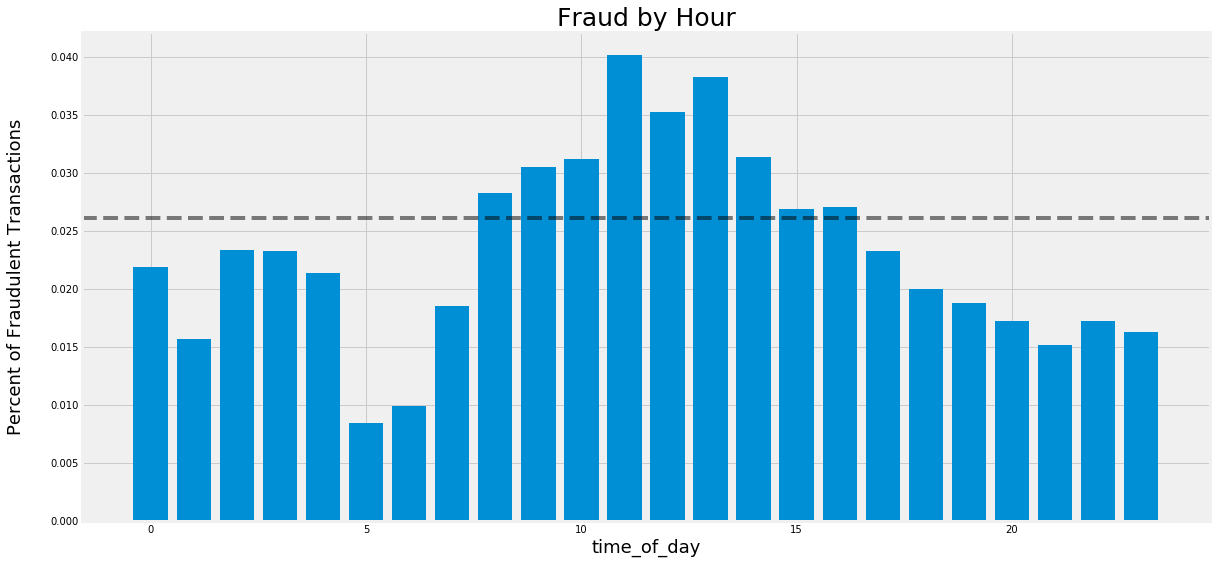

In [207]:
fig, ax = plt.subplots(figsize=(18, 9))
likes = df.groupby('hour').fraud.mean()
ax.set_title('Fraud by Hour', fontsize=25)
ax.set_xlabel('time_of_day', fontsize=18)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.bar(likes.index, likes)
#fig.savefig('visuals/fraudbyhour.png')

In [219]:
user_mask = df.custAttr1.value_counts()[(df.custAttr1.value_counts() > 1)].index

In [231]:
single_purchases = df[df.custAttr1.isin(user_mask)]
multiple_purchases = df[~df.custAttr1.isin(user_mask)]
single_counts = single_purchases.shape[0]
multiple_counts = multiple_purchases.shape[0]
single_prob = single_purchases.fraud.mean()
multi_prob = multiple_purchases.fraud.mean()

In [232]:
pd.DataFrame(data={'Number of Purchases': [single_counts, multiple_counts],
              'Percent of Fraud': [single_prob, multi_prob]},
             index=['Single Transaction', 'Multiple Transactions'])

,Number of Purchases,Percent of Fraud
Single Transaction,39833,0.026812
Multiple Transactions,56070,0.025647


In [319]:
email_counts[email_counts==92]

clintmiller.com    92
Name: email, dtype: int64

In [16]:
idx = pd.IntervalIndex(df.hour1.values, closed='both', verify_integrity=False)

TypeError: type <class 'numpy.int64'> with value 0 is not an interval